<a href="https://colab.research.google.com/github/jacobw59/PhysicsI_Labs/blob/main/phy122_N3L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 3

Jacob Williamson

4/7/2025

#  <font color='Red'> **Import Necessary Modules** </font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange, array, zeros
from numpy.linalg import norm

np.set_printoptions(precision=4, linewidth=200, threshold=2000, suppress=True)

π =  np.pi

###  <font color='Green'> Necessary Defintions. </font>

In [ ]:
###
def rotation_xy(θ):
    """
    GIVEN: θ (in degrees)
    GET: rotation matrix
    """
    θ *= np.pi/180
    return np.array([ [np.cos(θ), -np.sin(θ), 0.], [np.sin(θ), np.cos(θ), 0.], [0., 0., 1.]])

def projection(basis, f_in):
    f_1 = np.dot( basis[0], f_in ) * basis[0]
    f_2 = np.dot( basis[1], f_in ) * basis[1]
    f_3 = np.dot( basis[2], f_in ) * basis[2]
    return [f_1, f_2, f_3]

def Ramp(θ, μS, μK, f_in):

    basis = (rotation_xy(θ) @ np.eye(3)).T

    f_fric, f_normal, f_z = projection(basis, -f_in)

    if np.linalg.norm(f_fric) <= np.linalg.norm( μS * f_normal ):
        None
    if np.linalg.norm(f_fric) > np.linalg.norm( μS * f_normal ):
        f_fric = np.linalg.norm(μK * f_normal) * f_fric / np.linalg.norm(f_fric)

    return f_normal + f_fric + f_z

#  <font color='Red'> **Experiment 1: Familiarization with Definitions.** </font>

###  <font color='Red'> The Rotation Matrix, print the rotation matrix for 3 angles of your choosing (note the defintion requires the angle in degrees). </font>

In [ ]:
print( rotation_xy(2) )
print( rotation_xy(20) )
print( rotation_xy(87) )

[[ 0.9994 -0.0349  0.    ]
 [ 0.0349  0.9994  0.    ]
 [ 0.      0.      1.    ]]
[[ 0.9397 -0.342   0.    ]
 [ 0.342   0.9397  0.    ]
 [ 0.      0.      1.    ]]
[[ 0.0523 -0.9986  0.    ]
 [ 0.9986  0.0523  0.    ]
 [ 0.      0.      1.    ]]


###  <font color='Red'> Choose a rotation matrix from above, to rotate the usual Cartesian Basis (i.e. (Rotation_Matrix @ np.eye(3)).T ) and print the result. </font>

In [ ]:
basis = (rotation_xy(30) @ np.eye(3)).T
print( basis )

[[ 0.7071  0.7071  0.    ]
 [-0.7071  0.7071  0.    ]
 [ 0.      0.      1.    ]]


###  <font color='Red'> Define an arbitrary acting force vector (3 component vector). </font>

In [ ]:
f_in  = array([-9.8, 0.0, 1.0])  # gravity acts in x-direction + wind in z
print(f_in)

[ 0.  -9.8  0. ]


###  <font color='Red'> Use Newton's 3rd Law to get a Reacting force (tentative. </font>

In [ ]:
f_react = -f_in  # expected: [9.8, -0.0, -1.0]
print(f_react)

[-0.   9.8 -0. ]


###  <font color='Red'> Project an arbitrary force vector, i.e. decompose into 3 vectors, e.g. f_in, on the new basis defined above. </font>

In [ ]:
f_fric, f_normal, f_z = projection(basis, f_react)

###  <font color='Red'> Filter the frictional-projection. 1st, define the static friction coefficient (μS) and then the kinetic friction coefficient (μK). 2nd, define two if-statements to determine if friction component of the force above should be the static XOR kinetic one. </font>

In [ ]:
μS = 0.6  # lower than before
μK = 0.3

if norm(f_fric) <= norm( μS * f_normal ): ## f_2
    None
if norm(f_fric) > norm( μS * f_normal ):
    f_2 = norm(μK * f_normal) * f_fric

###  <font color='Red'> Now determine the total force: f_in = -f_out $\rightarrow$ f_in + f_out = f_net. e.g. in the static limit f_net = 0. Print this net force. </font>

In [ ]:
net_force = f_fric + f_normal + f_z + f_in

print("Net Force is %4.3f N" %(norm(net_force) ) )

Net Force is 0.000 N


###  <font color='Red'> Now use: Ramp(θ, μS, μK, f_in), to get the reactive force (f_out), with your choice of angle (θ), static friction coefficient (μS), kinetic friction coefficient (μK), and the f_in you defined above.

### Add this to f_in, do the results match from above? </font>

In [ ]:
print("Net Force is %4.3f N" %( norm( Ramp(45, μS, μK, f_in) + f_in ) ) )

Net Force is 0.000 N


#  <font color='Red'> **Experiment 2: Varying Angle.** </font>

###  <font color='Red'> Define the range of angles you wish to test (using arange). </font>

In [ ]:
θs = arange(0,90,0.1) ## range of angles you wish to test

###  <font color='Red'> Define a for-loop over these values. And get the force-magnitude for every value in the angle array defined above. Fix the value of the static friction, set kinetic friction to 0. Free feel to use the Ramp method. </font>

In [ ]:
f  = zeros(len(θs)) ## create an empty array to fill-in later of length θs
for i in range(len(θs)): ## for-loop over all configurations, e.g. array θs
    f[i] = norm( Ramp(θs[i], 1., 0.0, f_in) + f_in ) ## compute the net-force given the i-th θs configuration

###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font>

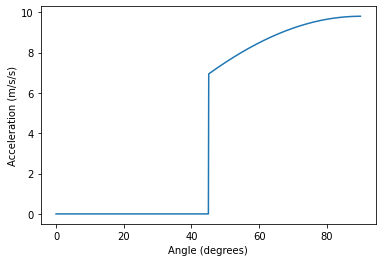

In [ ]:
plt.plot(θs, f)
plt.xlabel("Angle (degrees)")
plt.ylabel("Acceleration (m/s/s)")
plt.show()

#  <font color='Red'> **Experiment 3: Varying Static Friction Coefficient.** </font>

###  <font color='Red'> Define the range of static-friction-coefficients you wish to test (using arange). </font>

In [ ]:
μs = arange(0,5,0.1) ## range of static friction coefficients you wish to test

###  <font color='Red'> Define a for-loop over these values. And get the force-magnitude for every value in the static-friction-coefficient array defined above. Fix the value of the angle, and set kinetic friction to 0. Free feel to use the Ramp method. </font>

In [ ]:
f  = zeros(len(μs)) ## create an empty array to fill-in later of length μs
for i in range(len(μs)): ## for-loop over all configurations, e.g. array μs
    f[i] = norm( Ramp(45, μs[i], 0.0, f_in) + f_in ) ## compute the net-force given the i-th μs configuration

###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font>

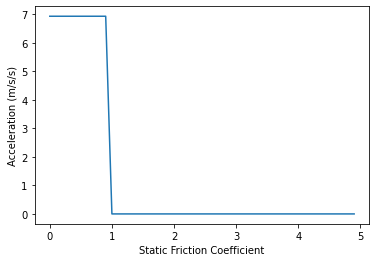

In [ ]:
plt.plot(μs, f)
plt.xlabel("Static Friction Coefficient")
plt.ylabel("Acceleration (m/s/s)")
plt.show()

#  <font color='Red'> **Experiment 4: Kinetic Friction and Dynamics.** </font>

###  <font color='Red'> Lets consider kinematics as discussed before, using the familiar Velocity-Verlet algorithm. </font>

###  <font color='Red'> Define the following 9 variables (similar to lab 2):
*   Time Resolution (dt)
*   Time-array
*   Mass of your particle
*   Initial Position (x0)
*   Initial Velocity set to zeros (v0 = np.zeros(3))
*   Initial Acceleration set to zeros (v0 = np.zeros(3))
*   Angle (θ)
*   Static Friction Coefficient (μs)
*   Static Friction Coefficient (μk)
 </font>

In [ ]:
θ  = 35   # Lower incline
μs = 0.7  # Moderate static friction
μk = 0.5  # Moderate kinetic friction

dt = 0.1
mass = 1.5  # kg
g = 9.8     # gravity

x0 = array([2.0,  5.0 , 0.])  # new position
v0 = array([-1.0, 0.0 , 0.])  # moving left initially
a0 = array([-1.0, 0.0, 0.]) * mass * g  # force in x-direction only

time = arange(0, 3, dt) ## s : time array (array containing all moments in time)

###  <font color='Red'> Define an acting force on this particle acting for all times, e.g. the force of gravity (it can be any force), i.e. f_t a 2D array, the same shape of the force defined in lab 2.  </font>

In [ ]:
f_t_act = zeros((len(time), 3))
f_t_act[:,0] = -1. * mass * g  # gravity in x-direction
f_t_act[:,2] = 1.2             # constant wind/drag in z

###  <font color='Red'> Define your Velocity Verlet, but with the new Force acting-reacting force term! To get the trajectory (for position, velocity, and acceleration)  </font>

In [ ]:
x_t = zeros((len(time), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
v_t = zeros((len(time), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a_t = zeros((len(time), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

x_t[0] = x0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
a_t[0] = (Ramp(θ, μs, μk, f_t_act[0]) + f_t_act[0] )/mass

for t in range(1,len(time)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
    x_t[t] = x_t[t-1] + v_t[t-1] * dt + a_t[t-1] * dt*dt/2 ## Velocity-Verlet Step 1 : find new position from old data
    a_t[t] = (Ramp(θ, μs, μk, f_t_act[t]) + f_t_act[t] )/mass ## compute new acceleration from the net-force
    v_t[t] = v_t[t-1] + (a_t[t-1] + a_t[t]) * dt/2 ## compute new velocity

###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font>

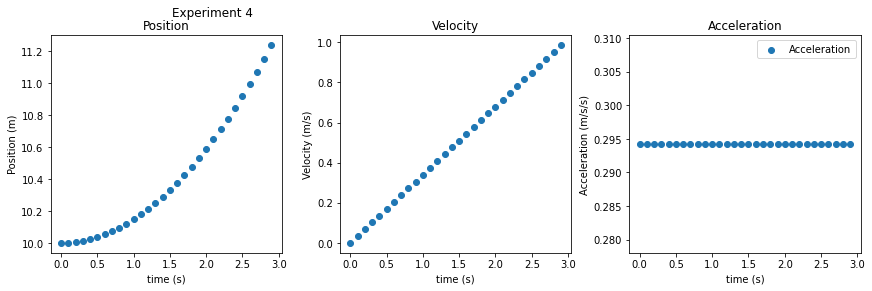

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment 4')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(time, x_t[:,1])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

#ax2.scatter(time, v_t[:,1])
ax2.scatter(time, norm(v_t, axis=1))
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(time, a_t[:,1], label="Acceleration")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

#  <font color='Red'> **Conclusion:** </font>

###  <font color='Red'> Write your Conclusion here, you may type in word-processor, only to copy-n-paste it here. This .ipynb file is your lab report. </font>

###  <font color='Red'> Demonstrate you understand this lab, this is the most imporant part of the lab report worth half of the total points. </font>



In this lab, I studied how forces act along an inclined plane. This was done by means of rotation matrices to change the reference frame, project force vectors and deal with static as well as kinetic friction. I used Ramp function to determine whether an object stays put or in motion according to angle and friction coefficients. By having these parameters changed, it observed how steeper angles and lower coefficient of friction lead to movement while higher friction resisted motion. A particle under gravity and friction was simulated over time, using the Velocity-Verlet algorithm; it demonstrated how net forces sum to one's ultimate acceleration. This is basically one of the labs to drill the concepts of Newtonian mechanics, especially reference frames and the switch between static and dynamic motion.




###  <font color='Red'> If your surface is completely parallel to the gravity-vector $\mathbf{g}$ (i.e. angle is 90 degrees from horizontal surface), can static friction support the object on this surface? </font>

When the surface is parallel to the vector of gravity (i.e., it is inclined at exactly a 90° angle from the horizontal), static friction will not support the object since the total weight of the object acts right down the slope. The maximum static friction is proportional to the normal force, but at 90°, it has no normal force at all, giving a maximum static friction of zero too. This indicates that there is no frictional resistance with which to counteract the forces of gravity, and the object must slide down.


###  <font color='Red'> Is there an angle, such that no motion occurs with a static friction coefficient of 0.0? </font>

So, when the static friction coefficient is 0.0, to prevent any motion from occurring, the angle of the surface must be 0 degrees-in that case, the surface is completely flat and horizontal. Only when the surface is flat would gravity act perpendicular to the surface, and there would not be any gravitational force component acting to try to pull the object down along the surface. Thus, with no forces tending to move it, friction, whether static or kinetic, is not required to keep the object at rest. Yet, for angles steeper than 0°, the gravitational force would have a component along the incline, and without static friction to resist it, the object would slide down.